In [2]:
!pip install tensorflow pillow matplotlib


In [4]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np


In [5]:
content_path = tf.keras.utils.get_file(
    'YellowLabradorLooking_new.jpg',
    'https://storage.googleapis.com/download.tensorflow.org/example_images/YellowLabradorLooking_new.jpg')

style_path = tf.keras.utils.get_file(
    'kandinsky5.jpg',
    'https://storage.googleapis.com/download.tensorflow.org/example_images/Vassily_Kandinsky%2C_1913_-_Composition_7.jpg')


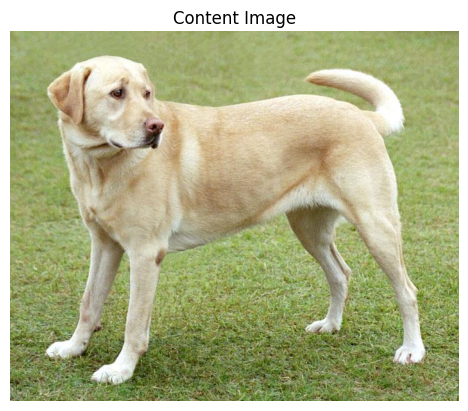

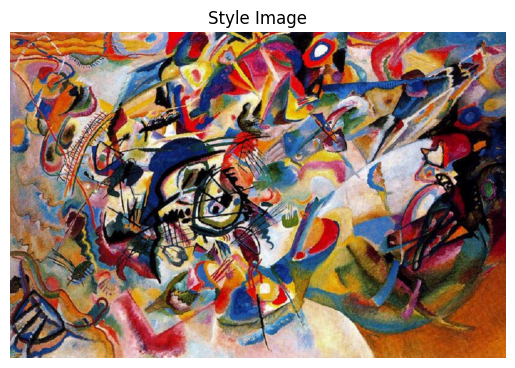

In [6]:
def load_and_display_image(path, title):
    img = load_img(path)
    plt.imshow(img)
    plt.title(title)
    plt.axis('off')
    plt.show()

load_and_display_image(content_path, "Content Image")
load_and_display_image(style_path, "Style Image")


In [7]:
def load_and_process_img(path_to_img):
    img = load_img(path_to_img, target_size=(512, 512))
    img = img_to_array(img)
    img = tf.image.convert_image_dtype(img, tf.float32)
    img = img[tf.newaxis, :]
    return img

content_image = load_and_process_img(content_path)
style_image = load_and_process_img(style_path)


In [10]:
!pip install tensorflow_hub


In [12]:
import tensorflow_hub as hub

# Load the model
hub_model = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')

# Apply style transfer
stylized_image = hub_model(tf.constant(content_image), tf.constant(style_image))[0]


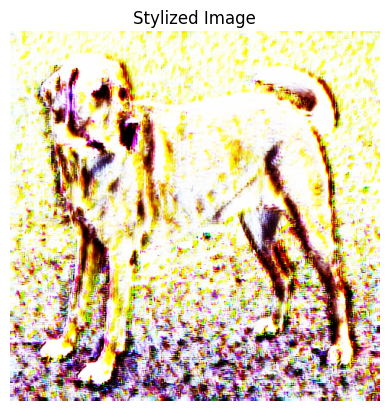

In [15]:
def tensor_to_image(tensor):
    tensor = tensor*255
    tensor = np.array(tensor, dtype=np.uint8)
    if np.ndim(tensor) > 3:
        tensor = tensor[0]
    return tensor

plt.imshow(tensor_to_image(stylized_image))
plt.title("Stylized Image")
plt.axis('off')
plt.show()


In [16]:
from PIL import Image

# Convert the stylized image tensor to a PIL image and save
final_image = Image.fromarray(tensor_to_image(stylized_image))
final_image.save("stylized_output.jpg")
print("Image saved as stylized_output.jpg")


Image saved as stylized_output.jpg


In [17]:
def neural_style_transfer(content_path, style_path, output_path="stylized_output.jpg"):
    content_image = load_img(content_path)
    style_image = load_img(style_path)

    content_image = preprocess(content_image)
    style_image = preprocess(style_image)

    stylized_image = hub_model(tf.constant(content_image), tf.constant(style_image))[0]
    final_image = Image.fromarray(tensor_to_image(stylized_image))
    final_image.save(output_path)
    print(f"Stylized image saved to {output_path}")


In [ ]:
content_path = r"C:\Users\anush\OneDrive\Pictures\shiva.ai.png"
style_path = r"C:\Users\anush\OneDrive\Pictures\mountain.png"

neural_style_transfer(content_path, style_path)
